# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno

# Connect to drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Read Data

In [18]:
df = pd.read_csv('/content/drive/MyDrive/DataSets/housing2.csv')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880,129.0,322.0,126,8.3252,452600
1,-122.22,37.86,21.0,7099,1106.0,2401.0,1138,8.3014,358500
2,-122.24,37.85,52.0,1467,190.0,496.0,177,7.2574,352100
3,-122.25,37.85,52.0,1274,235.0,558.0,219,5.6431,341300
4,-122.25,37.85,NaN,1627,280.0,NaN,259,3.8462,342200
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665,374.0,845.0,330,1.5603,78100
20636,-121.21,39.49,18.0,697,150.0,356.0,114,2.5568,77100
20637,-121.22,39.43,17.0,2254,485.0,1007.0,433,1.7000,92300
20638,-121.32,39.43,18.0,1860,409.0,741.0,349,1.8672,84700


# EDA

In [4]:
df.shape

(20640, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20382 non-null  float64
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      15758 non-null  float64
 5   population          20596 non-null  float64
 6   households          19335 non-null  object 
 7   median_income       17873 non-null  float64
 8   median_house_value  20640 non-null  int64  
dtypes: float64(6), int64(2), object(1)
memory usage: 1.4+ MB


* Issues found "household" readed as object not int
* Solution replace "household" nulls with 0 to convert it to int

In [19]:
# show nulls as a percentage
df.isnull().sum() / len(df) * 100

,0
longitude,0.000000
latitude,0.000000
housing_median_age,1.250000
total_rooms,0.000000
total_bedrooms,23.653101
population,0.213178
households,6.322674
median_income,13.406008
median_house_value,0.000000


In [20]:
df['households'] = df['households'].fillna(0)

In [21]:
df['households'] = df['households'].replace('no', 0).astype(int)

In [22]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20382.000000,20640.000000,15758.000000,20596.000000,20640.000000,17873.000000,20640.000000
mean,-119.569704,35.631861,28.676283,2635.763081,539.920104,1424.928724,394.402035,3.939403,206855.816909
std,2.003532,2.135952,12.589284,2181.615252,419.834171,1132.237768,393.274600,1.943517,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,0.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,124.000000,2.598600,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,338.000000,3.587100,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,652.000000,1725.000000,538.000000,4.830400,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100,500001.000000


Check Nulls

In [23]:
df.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,258
total_rooms,0
total_bedrooms,4882
population,44
households,0
median_income,2767
median_house_value,0


* "household" has nulls but equla to 0

<Axes: >

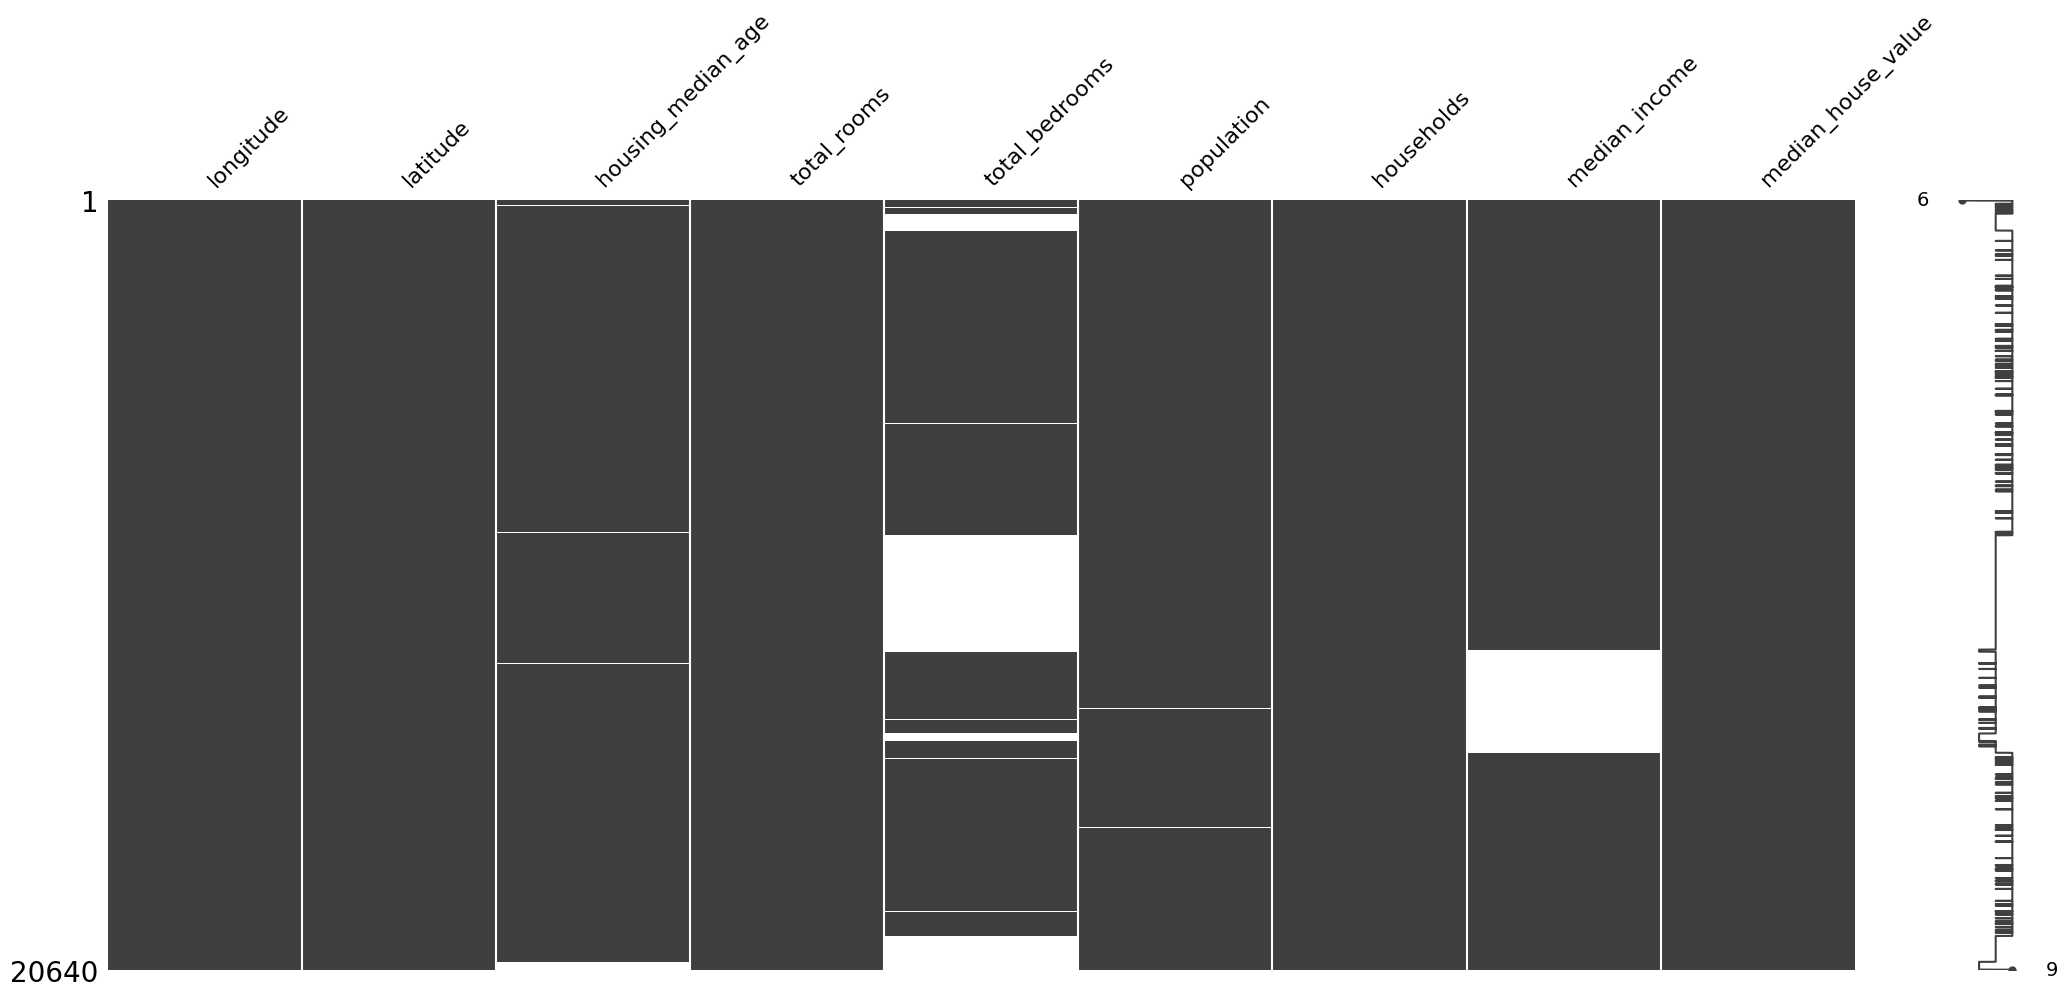

In [24]:
missingno.matrix(df)

Check Outliers

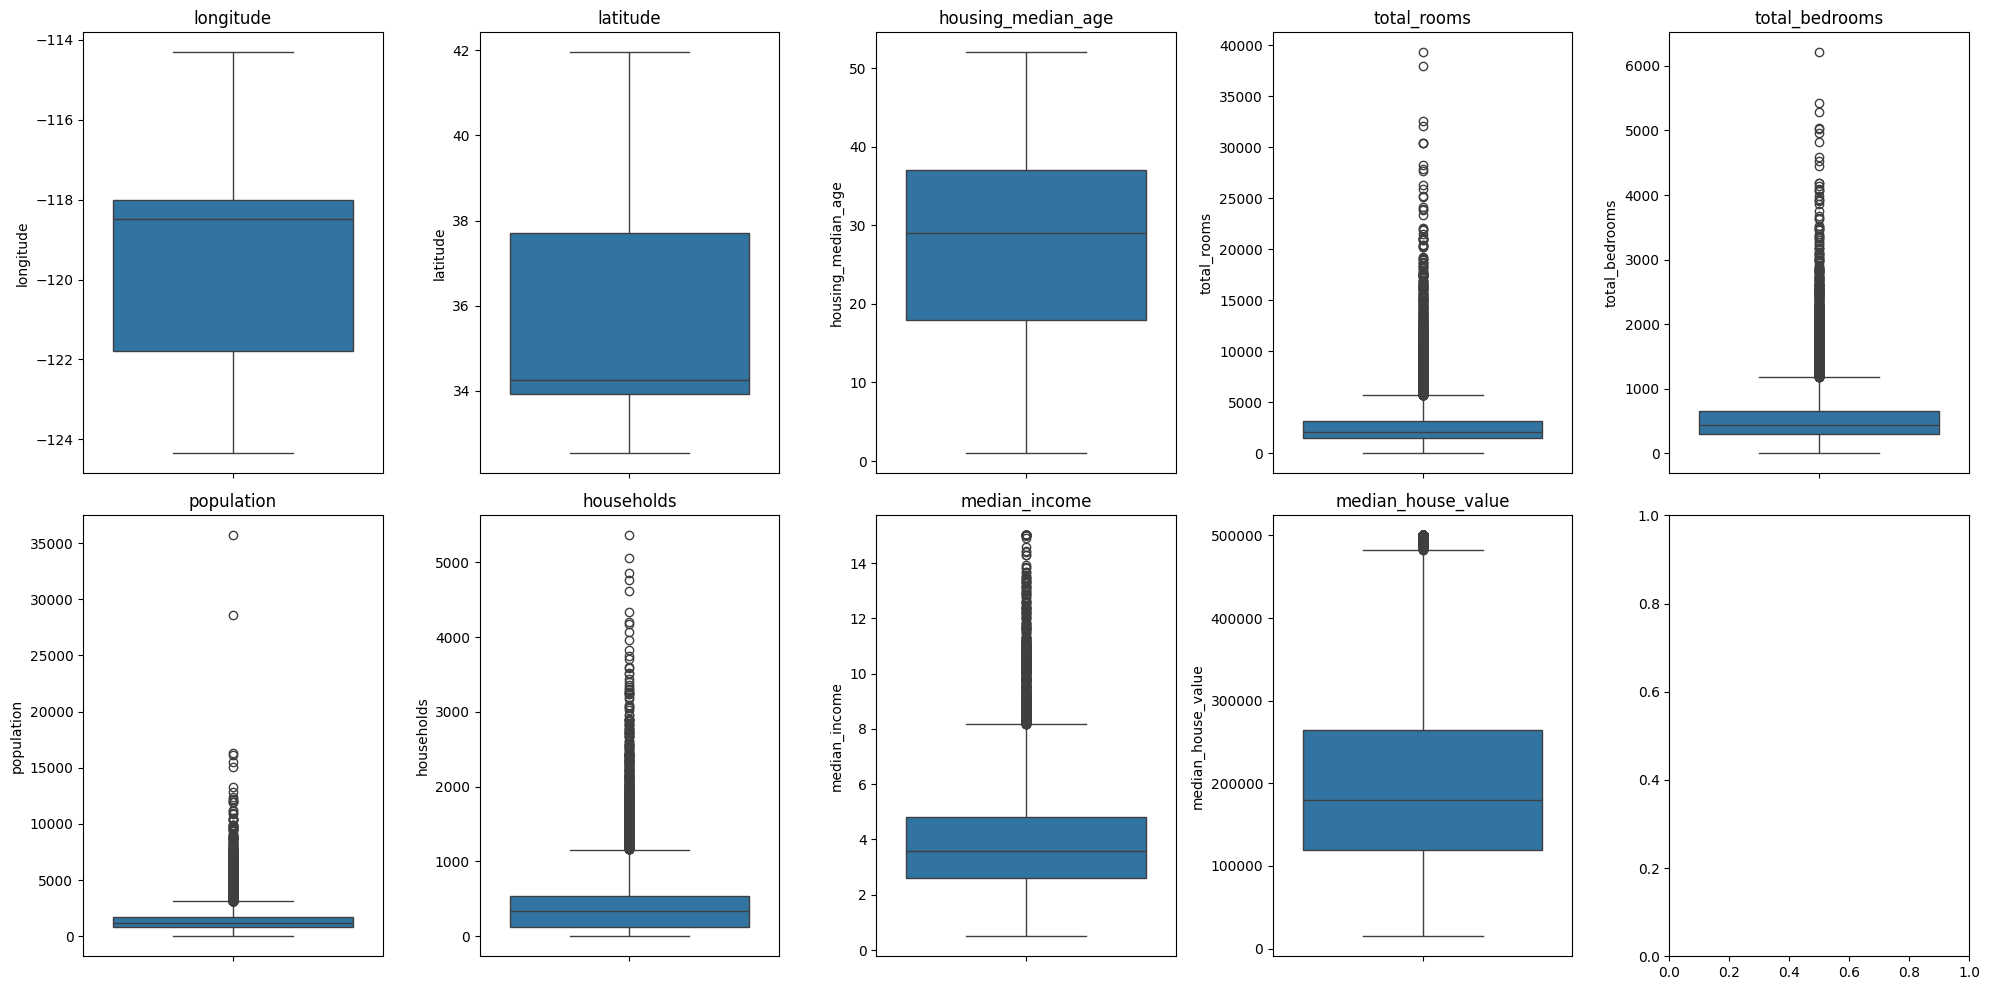

In [25]:
fig, axes = plt.subplots(2, 5, figsize=(20, 10))
axes = axes.flatten()
for i, col in enumerate(df.select_dtypes(include=np.number).columns):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(col)
plt.tight_layout()
plt.show()

# Data Cleaning

## Missing Values

drop nulls in columns that have small percentage of nulls (housing_median_age , housing_median_age)

replace other coulmns nulss with median to avoid outliers effect

In [26]:
df.dropna(subset=['housing_median_age', 'population'], inplace=True)

In [27]:
for column in df.columns:
    if df[column].isnull().any():
        median_val = df[column].median()
        df[column].fillna(median_val, inplace=True)

/tmp/ipython-input-27-153444107.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(median_val, inplace=True)


In [29]:
df['households'] = df['households'].replace(0, df['households'].median())

In [30]:
df.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0


## Outliers

In [31]:
# Function to detect outliers
def find_outliers(df):
    outliers_dict = {}
    for column in df.columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Find outliers
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
        outliers_dict[column] = {
            'count': len(outliers),
            'values': outliers.tolist()
        }
    return outliers_dict

# Get outliers
outliers_result = find_outliers(df)

# Print results
for column, result in outliers_result.items():
    print(f"{column}:")
    print(f"  Number of outliers: {result['count']}")
    print(f"  Outlier values: {result['values']}")
    print()

longitude:
  Number of outliers: 0
  Outlier values: []

latitude:
  Number of outliers: 0
  Outlier values: []

housing_median_age:
  Number of outliers: 0
  Outlier values: []

total_rooms:
  Number of outliers: 1270
  Outlier values: [7099, 5806, 5871, 5963, 12842, 7355, 7031, 18634, 5785, 6909, 14316, 6740, 5914, 5778, 8299, 7518, 9963, 5861, 6711, 6243, 16199, 14917, 5719, 8647, 8112, 10648, 14014, 8444, 6462, 8918, 6647, 10687, 6103, 5811, 28258, 7441, 9167, 6483, 6352, 7477, 6473, 8072, 7397, 7490, 9540, 13182, 9621, 6159, 12070, 6296, 20354, 8068, 14701, 9831, 6010, 7653, 7254, 10265, 14631, 7744, 7212, 5690, 7272, 7450, 7188, 6440, 9217, 7957, 7105, 14684, 6365, 5765, 6992, 10191, 6915, 9135, 7136, 6895, 6290, 6445, 5732, 7803, 12713, 10093, 5869, 7201, 9576, 6349, 6039, 6719, 5721, 5688, 6488, 11336, 14652, 6875, 7241, 5948, 8213, 6200, 8953, 7479, 7681, 9117, 7178, 10212, 5738, 6986, 6130, 7475, 6201, 9147, 7200, 7505, 17032, 11444, 6306, 7999, 6265, 15259, 7578, 6508, 6487,

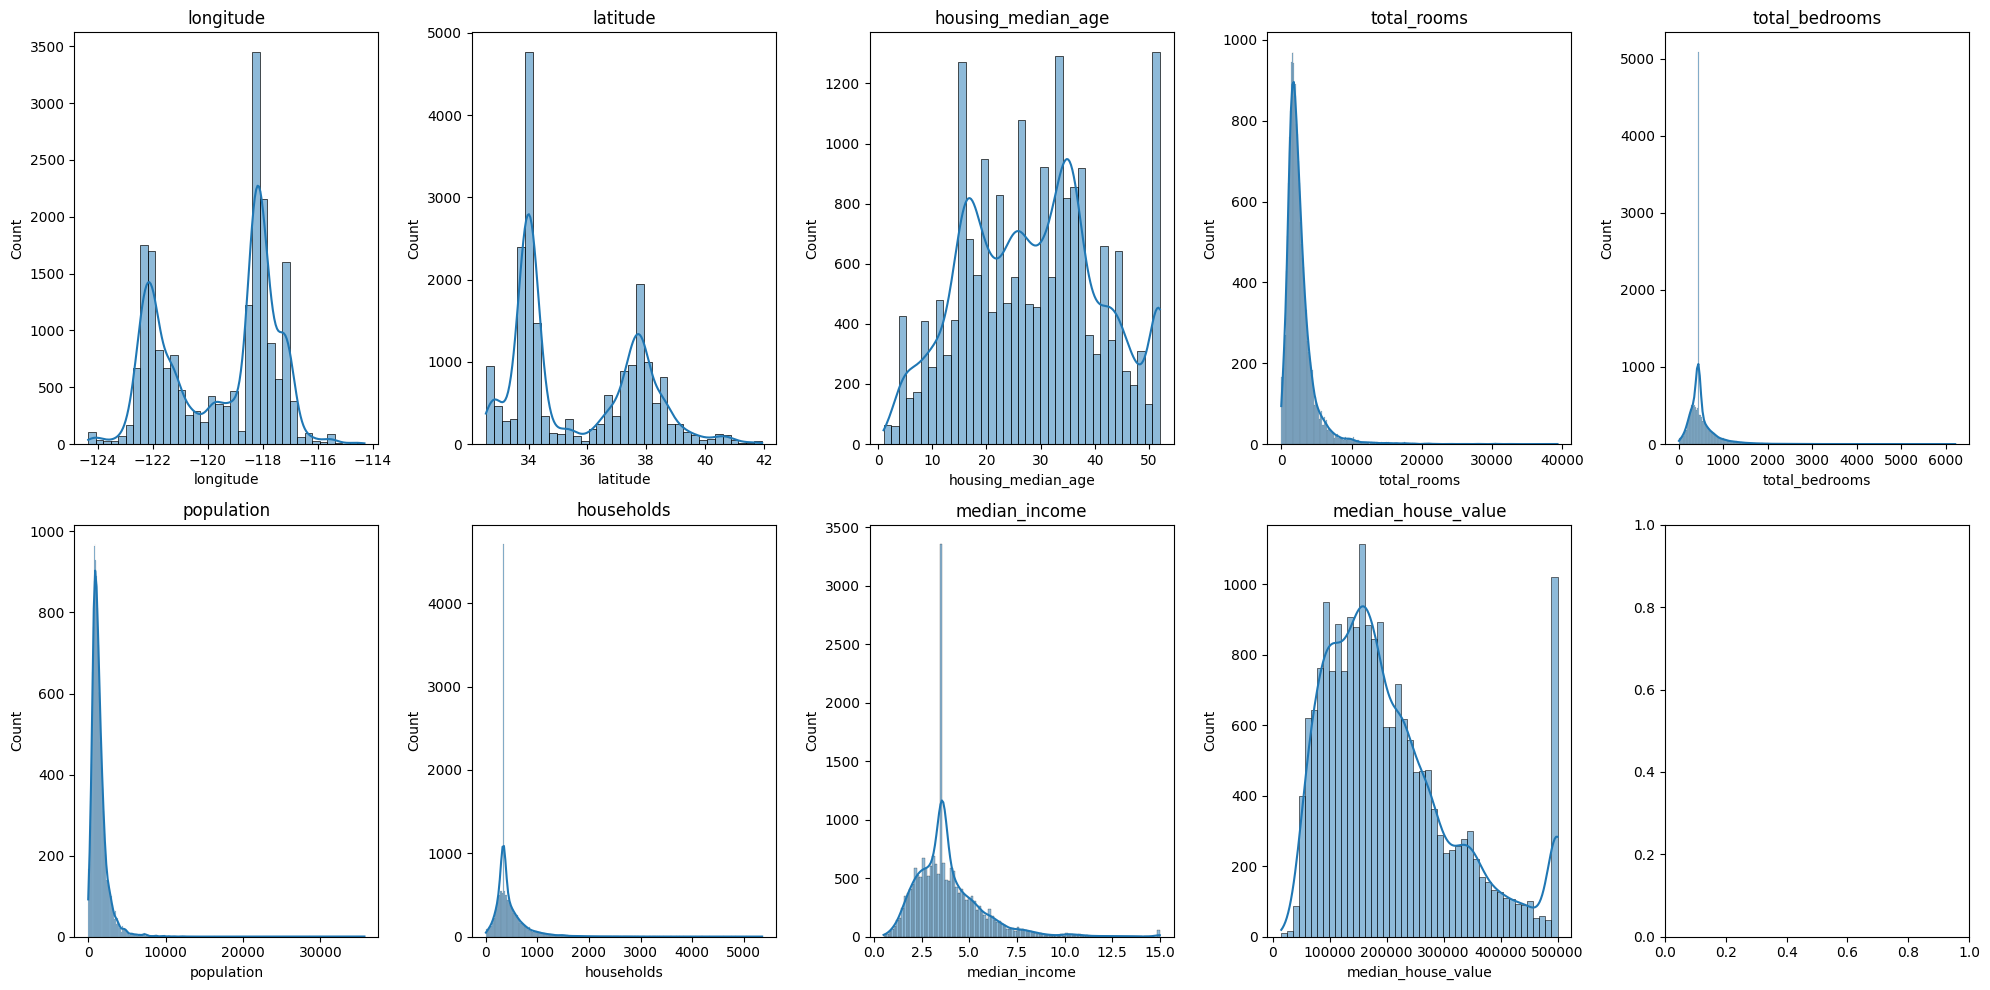

In [32]:
# Visualization of Distribution
fig, axes = plt.subplots(2, 5, figsize=(20, 10))
axes = axes.flatten()

for i, col in enumerate(df.select_dtypes(include=np.number).columns):
    sns.histplot(data=df, x=col, kde=True, ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

Clamp outlires and log-transform any highly skewed variable

In [38]:
num_cols = list(set(df.describe().columns.to_list()) - set(["longitude"]) - set(["latitude"]) - set(["housing_median_age"]))

In [39]:
# IQR method to clamp outliers
def outliers_clamping(col, value):
    Q1 = np.percentile(df[col], q = 25, interpolation = 'midpoint')
    Q3 = np.percentile(df[col], q = 75, interpolation = 'midpoint')
    IQR = Q3 - Q1
    Upper_Bound = Q3 + 1.5*IQR # max  e.g 10
    Lower_Bound = Q1 - 1.5*IQR # min
    if value > Upper_Bound:
        return Upper_Bound # max
    else:
        return value

In [40]:
def skewness_calc(col ,df):
    std_col = np.std(df[col])
    mean_col = np.mean(df[col])
    size_rows = df.shape[0]
    df['diff_col'] = df[col] - mean_col
    df['diff_col_powered'] = np.power(df['diff_col'], 3)
    skewness = np.sum(df['diff_col_powered'])/((size_rows - 1) * np.power(std_col, 3))
    df = df.drop(columns = ['diff_col_powered', 'diff_col'])
    return skewness

In [41]:
def skewed_data_transformation(value, skewness):
    if (skewness >= 1 or skewness <= -1) and value >= 0:
        return np.log(1+ value)
    else:
        return value

In [42]:
for col in num_cols:
  df[col] = df[col].apply(lambda x: outliers_clamping(col, x))#apply :function discover the data and defined if data applied or not
#loop for column column
for col in num_cols:
  sk = skewness_calc(col, df)
  df[col] = df[col].apply(lambda x: skewed_data_transformation(x, sk))

/tmp/ipython-input-42-800059930.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  df[col] = df[col].apply(lambda x: outliers_clamping(col, x))#apply :function discover the data and defined if data applied or not
/tmp/ipython-input-42-800059930.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  df[col] = df[col].apply(lambda x: outliers_clamping(col, x))#apply :function discover the data and defined if data applied or not
/tmp/ipython-input-42-800059930.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional opt